In [1]:
import pandas as pd
import os as os
import seaborn as sns
os.chdir('D:\\')
% matplotlib inline
import matplotlib.pyplot as plt


In [2]:
os.listdir()

['$RECYCLE.BIN',
 '.RData',
 '.Rhistory',
 '.Rproj.user',
 '20170107_235933.jpg',
 '20170107_235933.rar',
 '94d5a5c4a69c5caf95883b7172',
 'AlbumArtSmall.jpg',
 'Arthashastra_of_Chanakya_-_English.pdf',
 'aug sep.xlsx',
 'AUGUST LULU 2016(5).xls',
 'AXIS BANK MUTUAL FUND.pdf',
 'axis bank statement.pdf',
 'AxisMFOnline.pdf',
 'BANGALORE TICKET brs..one',
 'bank statement.pdf',
 'beautiful soup.xlsx',
 'BigDiamonds.csv',
 'Book1.xlsx',
 'Boston (1).csv',
 'bucon increment letter.pdf',
 'bucon Septmber.xlsx',
 'C.docx',
 'CANCELLED CHEQUE.pdf',
 'CANCELLED CHEQUE.txt',
 'ccFraud.csv',
 'ChatLog Data Analytics Course 2-introduction sas.rtf',
 'ChatLog Data Analytics Course Weekday Batch  2017_02_09 21_38.rtf',
 'cheque copy.pdf',
 'class on may 9th.docx',
 'classgroupbypivot.ipynb',
 'connect to postgres',
 'control panel.docx',
 'Cookbook pandas.docx',
 'copy formula.docx',
 'Copy of Bucon- August 2016  latest(1).xlsx',
 'Copy of Bucon- August 2016  latest.xlsx',
 'Copy of Practice file a

In [3]:
fraud=pd.read_csv('ccFraud.csv')

In [4]:
fraud.head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk,fraud
0,672708,2,18,1,3458,2,4,7,0,highfraud
1,94787,1,15,1,3458,8,60,17,0,highfraud
2,974787,1,35,1,3458,13,1,3,0,highfraud
3,350035,2,35,1,3458,39,0,6,0,highfraud
4,158078,2,13,1,3458,27,0,25,0,highfraud


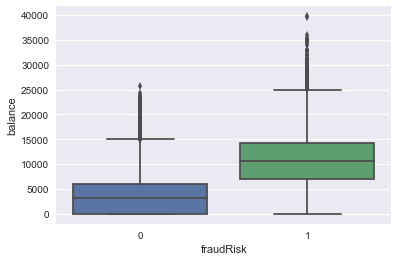

In [5]:
sns.boxplot(x='fraudRisk',y='balance',data=fraud)

At higher balances the fraudRisk is higher

C:\Users\admin\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


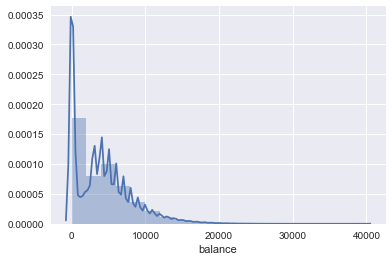

In [6]:

sns.distplot(fraud.balance,bins=20,kde=True,rug=False)

The range of balances is between 0 and 40000 in the dataset fraud

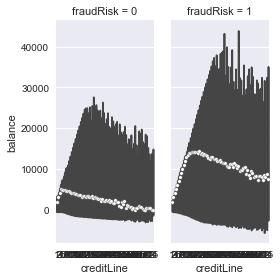

In [7]:
sns.factorplot(x='creditLine',y='balance',col='fraudRisk',data=fraud,kind='violin',size=4,aspect=.5)

from the above table it can be seen that at fraudRisk=1 there is a higher creditLine and higher balance and higher fraud Risk 


In [8]:
from ggplot import*

In [9]:
p=ggplot(aes(x='balance',y='creditLine',colour='fraudRisk'),data=fraud)

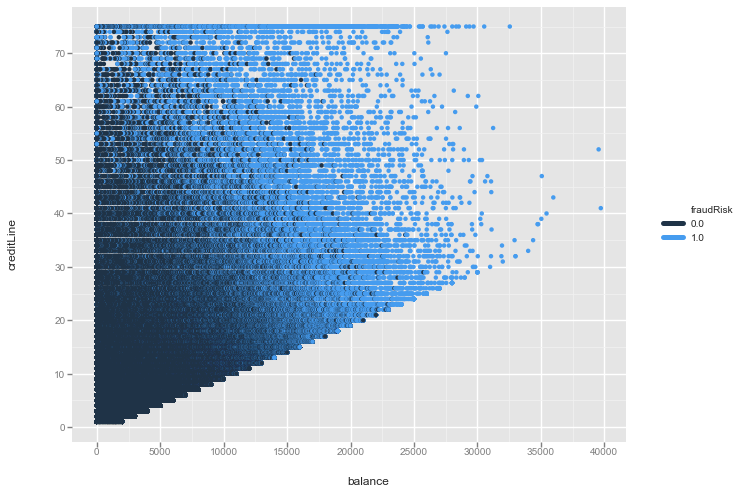

<ggplot: (-9223372036833127487)>

In [10]:
p+geom_point()

At higher credit line and balance level the fraudRisk is higher



In [11]:
fraud1=fraud[['fraudRisk','gender','numTrans','numIntlTrans']]


In [12]:
type(fraud1)


pandas.core.frame.DataFrame

In [13]:
type(fraud)

pandas.core.frame.DataFrame

In [14]:
var=fraud1.groupby('gender').fraudRisk.count()
var

gender
1    647233
2    401342
Name: fraudRisk, dtype: int64

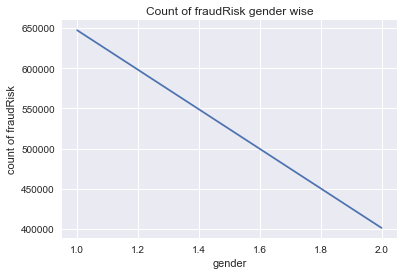

In [15]:
plt.plot(var)
plt.xlabel('gender')
plt.ylabel('count of fraudRisk')
plt.title('Count of fraudRisk gender wise')

from the above table it can be seen that gender 1 has more fraudRisk compared to gender2

In [16]:
fraud.columns

Index(['custID', 'gender', 'state', 'cardholder', 'balance', 'numTrans',
       'numIntlTrans', 'creditLine', 'fraudRisk', 'fraud'],
      dtype='object')

In [17]:
import statsmodels.formula.api as sm

In [18]:
result1=sm.ols(formula="numTrans~numIntlTrans",data=fraud).fit()

In [19]:
p=ggplot(aes(x='numTrans',y='numIntlTrans',color='fraudRisk'),data=fraud)

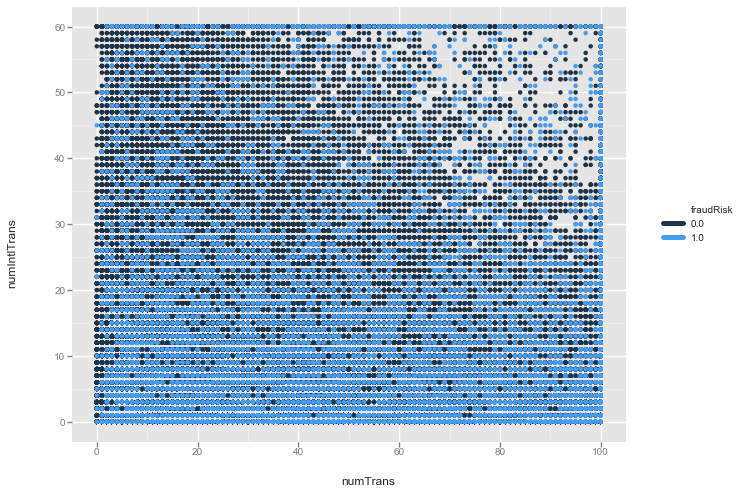

<ggplot: (-9223372036843070022)>

In [20]:
p+geom_point()

It can be seen that while dealing with international transactions there is less fraudRisk as compared to national transactions.
While dealing only in national transactions the risk is very high. 

In [21]:
p2=ggplot(aes(x='numTrans',y='numIntlTrans',color='balance'),data=fraud)

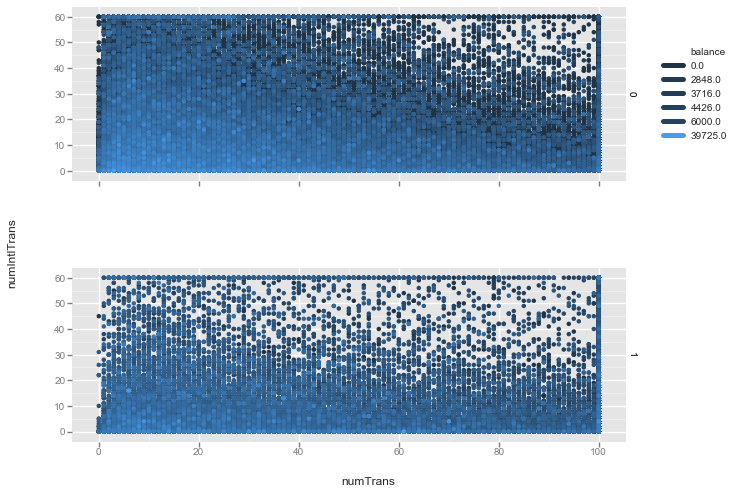

<ggplot: (11740708)>

In [22]:
p2+geom_point()+facet_grid('fraudRisk')

There is higher concentration of high balances at international transactions which are safe  compared to local transactions.ie risky 
of high balances being defaulted is more as number of local transactions increase compared to international transactions